- Buscar una base de datos de Physionet de imágenes médicas y extraer una porción de ellas (probablemente 50 imágenes de cada clase)
- Hacer una red neuronal multicapa grande para hacer la clasificación consideren usar 3 capas ocultas o más
- Luego prueban si hay overfitting, si hay, reducir la red, aplicar regularización y dropout en ese orden. Luego probar combinaciones entre ellas para mejorar el modelo. Verificar con funciones de pérdida o costo [min 20 epoc] y métrica accuracy.

Diego Salvatierra Guillermo 71468870

In [83]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models, layers, optimizers

In [84]:


# Parámetros de la red neuronal
input_shape = (150, 150, 3)  # Tamaño de las imágenes
num_classes = 4
batch_size = 32
epochs = 20




Para fines del challenge, se ha separado la data en 4 carpetas, cada carpeta representa una clase: 'glicoma', 'meningioma', 'notumor', 'pituitary'.
Y se han colocado 50 imágenes en cada carpeta. La base de datos está disponibe en : https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data


In [85]:
# Cargar imágenes
def load_data(data_dir, classes):
    images = []
    labels = []
    for i, cls in enumerate(classes):
        folder_path = os.path.join(data_dir, cls)
        print("Cargando imágenes de la carpeta:", folder_path)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            print("Cargando imagen:", img_path)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 150))  # Ajusta el tamaño de la imagen según tu preferencia
            images.append(img)
            labels.append(i)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Establecer la ruta de las carpetas de las imágenes
data_dir = '/content'  # Directorio principal que contiene las subcarpetas de las clases
classes = ['glicoma', 'meningioma', 'notumor', 'pituitary']  # Nombre de las subcarpetas/clases

images, labels = load_data(data_dir, classes)

Cargando imágenes de la carpeta: /content/glicoma
Cargando imagen: /content/glicoma/Te-gl_0020.jpg
Cargando imagen: /content/glicoma/Te-gl_0048.jpg
Cargando imagen: /content/glicoma/Te-gl_0039.jpg
Cargando imagen: /content/glicoma/Te-gl_0013.jpg
Cargando imagen: /content/glicoma/Te-gl_0012.jpg
Cargando imagen: /content/glicoma/Te-gl_0058.jpg
Cargando imagen: /content/glicoma/Te-gl_0011.jpg
Cargando imagen: /content/glicoma/Te-gl_0059.jpg
Cargando imagen: /content/glicoma/Te-gl_0015.jpg
Cargando imagen: /content/glicoma/Te-gl_0047.jpg
Cargando imagen: /content/glicoma/Te-gl_0044.jpg
Cargando imagen: /content/glicoma/Te-gl_0022.jpg
Cargando imagen: /content/glicoma/Te-gl_0056.jpg
Cargando imagen: /content/glicoma/Te-gl_0021.jpg
Cargando imagen: /content/glicoma/Te-gl_0025.jpg
Cargando imagen: /content/glicoma/Te-gl_0035.jpg
Cargando imagen: /content/glicoma/Te-gl_0030.jpg
Cargando imagen: /content/glicoma/Te-gl_0042.jpg
Cargando imagen: /content/glicoma/Te-gl_0036.jpg
Cargando imagen: /c

In [89]:
# Dividir datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Construir la red neuronal
model = Sequential()
model.add(Flatten(input_shape=input_shape))  # Aplanar la entrada
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluar el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
5/5 [==============================] - 7s 1s/step - loss: 9038.1973 - accuracy: 0.2562 - val_loss: 6283.5815 - val_accuracy: 0.4000
Epoch 2/20
5/5 [==============================] - 4s 829ms/step - loss: 3016.4290 - accuracy: 0.4563 - val_loss: 2475.9368 - val_accuracy: 0.3250
Epoch 3/20
5/5 [==============================] - 5s 1s/step - loss: 1456.7009 - accuracy: 0.4688 - val_loss: 1652.7828 - val_accuracy: 0.3500
Epoch 4/20
5/5 [==============================] - 7s 2s/step - loss: 595.0563 - accuracy: 0.5375 - val_loss: 438.7428 - val_accuracy: 0.4500
Epoch 5/20
5/5 [==============================] - 4s 832ms/step - loss: 219.9133 - accuracy: 0.6875 - val_loss: 529.0408 - val_accuracy: 0.4000
Epoch 6/20
5/5 [==============================] - 4s 839ms/step - loss: 81.4383 - accuracy: 0.8000 - val_loss: 390.5264 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 5s 1s/step - loss: 43.9217 - accuracy: 0.8500 - val_loss: 437.5173 - val_accuracy: 0.4750


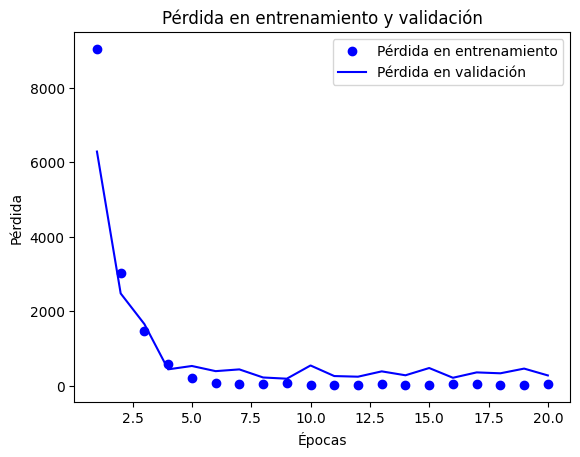

In [90]:
# Plotear la pérdida durante el entrenamiento
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss_values, 'b', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Podemos ver que a medida que los epoch aumentan, el error de validación disminuye, pero también disminuye el error de test. Esto nos quiere decir que no hay overfitting. Pero el accuracy es bajo (0.65)

Esto se puede deber a que solo hemos usado 50 imágenes por cada clase, y además algunas imágenes estaban volteadas, es decir no estaban uniformizadas. Se podría probar aumentando el número de capas ocultas
